In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
import statsmodels.api as sm
#import our data for correlatin analys in python with dataframe

In [3]:
df=pd.DataFrame(pd.read_csv ('C:/Users/borsh/OneDrive/Рабочий стол/BI/projects/ForestlyActivitiesProject/project data/data-1760379126636.csv'))
df.head(10)    

,wood_fuel_cost,year,industrial_rw_cost
0,478.616000,2018,1390.204000
1,488.376000,2019,1404.528000
2,450.210271,2020,1316.084700
3,568.388960,2021,2290.164254
4,814.320000,2022,2823.324000
5,911.826630,2023,2649.323396
6,906.448000,2024,2887.800112


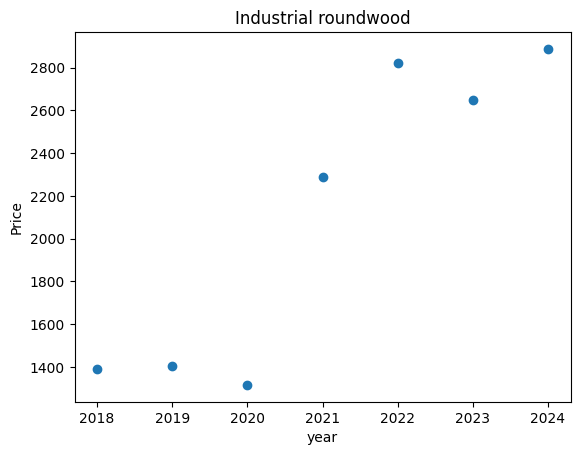

In [4]:
#show the plot to look at the data 
plt.scatter(x=df['year'],y=df['industrial_rw_cost'])
plt.title('Industrial roundwood')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()


In [5]:
#let's look at correlation 
df.corr()

,wood_fuel_cost,year,industrial_rw_cost
wood_fuel_cost,1.000000,0.919716,0.932493
year,0.919716,1.000000,0.913707
industrial_rw_cost,0.932493,0.913707,1.000000


### Create a regression

In [6]:
x=sm.add_constant(df['year'])
y=df['industrial_rw_cost']
ols_basic= sm.OLS(y,x).fit()
print(ols_basic.summary())

                            OLS Regression Results                            
Dep. Variable:     industrial_rw_cost   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     25.28
Date:                Thu, 30 Oct 2025   Prob (F-statistic):            0.00401
Time:                        17:38:21   Log-Likelihood:                -49.114
No. Observations:                   7   AIC:                             102.2
Df Residuals:                       5   BIC:                             102.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.107e+05   1.22e+05     -5.010      0.0

In [7]:
#Now let's derive the regression formula with numpy
reg=np.polyfit(df['year'],df['industrial_rw_cost'],deg=1)
reg
b1=reg[0]
b0=reg[1]
print(b1,b0)
#that's means that your regression representating by the equation= b1*['year']+ b0

303.2006581789005 -610659.7546850946


### Сreate a confidence interval for our regression model 

In [8]:
pred = ols_basic.get_prediction(x)
pred_summary = pred.summary_frame(alpha = 0.5)
print(pred_summary[['mean','mean_ci_lower','mean_ci_upper']])

          mean  mean_ci_lower  mean_ci_upper
0  1199.173520    1041.163931    1357.183109
1  1502.374178    1378.421258    1626.327098
2  1805.574836    1707.581449    1903.568224
3  2108.775494    2021.127544    2196.423445
4  2411.976153    2313.982765    2509.969540
5  2715.176811    2591.223891    2839.129731
6  3018.377469    2860.367880    3176.387058


### Create a prediction interval 

In [9]:
pred = ols_basic.get_prediction(x)
pred_summary = pred.summary_frame(alpha = 0.5)
print(pred_summary[['mean','obs_ci_lower','obs_ci_upper']])

          mean  obs_ci_lower  obs_ci_upper
0  1199.173520    918.563163   1479.783877
1  1502.374178   1239.430327   1765.318029
2  1805.574836   1553.825266   2057.324407
3  2108.775494   1860.869655   2356.681334
4  2411.976153   2160.226582   2663.725723
5  2715.176811   2452.232960   2978.120662
6  3018.377469   2737.767112   3298.987826


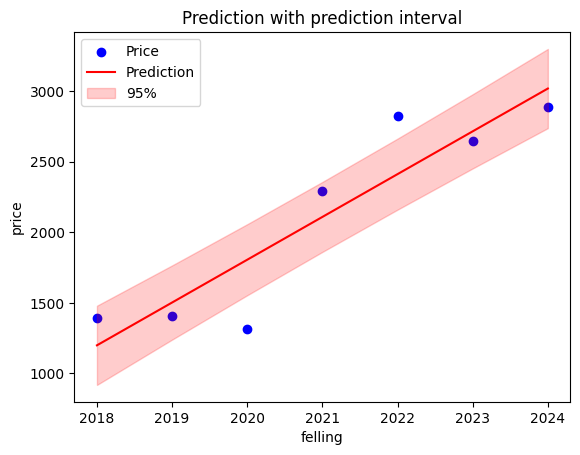

In [10]:
plt.scatter(df['year'],df['industrial_rw_cost'],color ='blue',label = 'Price')
plt.plot(df['year'],pred_summary['mean'],color ='red', label = 'Prediction')
plt.fill_between(df['year'], pred_summary['obs_ci_lower'], pred_summary['obs_ci_upper'],color = 'red', alpha =0.2, label = '95%')
plt.xlabel('felling')
plt.ylabel('price')
plt.title('Prediction with prediction interval')
plt.legend()
plt.show()

### Get some prediction

In [11]:
X=sm.add_constant((pd.concat([df['year'],pd.Series([2025,2026,2027])])))
prediction= ols_basic.get_prediction(X)
forecast=prediction.summary_frame(alpha=0.05)
forecast.index = X[0]
print(forecast[['mean','mean_ci_lower','mean_ci_upper','obs_ci_lower','obs_ci_upper']])

             mean  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0                                                                          
2018  1199.173520     640.230443    1758.116597    206.542522   2191.804518
2019  1502.374178    1063.903154    1940.845202    572.236675   2432.511681
2020  1805.574836    1458.933055    2152.216617    915.035977   2696.113696
2021  2108.775494    1798.729660    2418.821329   1231.833447   2985.717542
2022  2411.976153    2065.334372    2758.617934   1521.437293   3302.515012
2023  2715.176811    2276.705787    3153.647835   1785.039308   3645.314314
2024  3018.377469    2459.434392    3577.320546   2025.746471   4011.008467
2025  3321.578127    2628.294565    4014.861689   2247.547852   4395.608403
2026  3624.778785    2789.954827    4459.602743   2454.381427   4795.176144
2027  3927.979444    2947.528428    4908.430459   2649.627720   5206.331167


We get an accurate forecast for 2025,2026 and 2027 of prices of industrial roundwood